# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [ ]:
cleaned_aviation_df = pd.read_csv('./data/cleaned_aviation_data.csv')

print(cleaned_aviation_df.shape)
print(cleaned_aviation_df.dtypes)
print(cleaned_aviation_df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001213X33306           Accident      LAX86LA166  1986-04-08   
1  20001213X33276           Accident     FTW86FA066B  1986-04-15   
2  20001213X33276           Accident     FTW86FA066A  1986-04-15   
3  20001213X33697           Accident     SEA86FA121B  1986-05-19   
4  20001213X33697           Accident     SEA86FA121A  1986-05-19   

       Location        Country Latitude Longitude Injury.Severity  \
0      MESA, AZ  United States      NaN       NaN       Non-Fatal   
1  HANKAMER, TX  United States      NaN       NaN        Fatal(2)   
2  HANKAMER, TX  United States      NaN       NaN        Fatal(2)   
3      MEAD, WA  United States      NaN       NaN        Fatal(2)   
4      MEAD, WA  United States      NaN       NaN        Fatal(2)   

  Aircraft.damage  ... Total.Fatal.Injuries Total.Serious.Injuries  \
0     Substantial  ...                  0.0                    0.0   
1       Destroyed  ...              

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [12]:
# Inspect Total.Passengers distribution first
print(cleaned_aviation_df['Total.Passengers'].describe())
print(f"\nPassengers <= 20: {(cleaned_aviation_df['Total.Passengers'] <= 20).sum()}")
print(f"Passengers > 20: {(cleaned_aviation_df['Total.Passengers'] > 20).sum()}")
print(f"Passengers NaN: {cleaned_aviation_df['Total.Passengers'].isna().sum()}")
# No NaNs to clean. Let's split into small and large airplane dataframes
small_planes_df = cleaned_aviation_df[cleaned_aviation_df['Total.Passengers'] <= 20].copy()
large_planes_df = cleaned_aviation_df[cleaned_aviation_df['Total.Passengers'] > 20].copy()
print(f"Small planes: {small_planes_df.shape[0]}")
print(f"Large planes: {large_planes_df.shape[0]}")

count    17855.000000
mean         9.178885
std         37.359168
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        576.000000
Name: Total.Passengers, dtype: float64

Passengers <= 20: 16984
Passengers > 20: 871
Passengers NaN: 0
Small planes: 16984
Large planes: 871


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

Top 15 Safest Makes - Small Planes:
Make
BOMBARDIER INC                    0.090909
MCDONNELL DOUGLAS                 0.094048
BOMBARDIER                        0.111264
BOEING                            0.141453
AVIAT AIRCRAFT INC                0.164474
MAULE                             0.164806
GRUMMAN ACFT ENG COR-SCHWEIZER    0.206897
AYRES                             0.215686
STINSON                           0.216408
AVIAT                             0.221429
BELLANCA                          0.222603
DIAMOND AIRCRAFT IND INC          0.222973
ROCKWELL INTERNATIONAL            0.223684
AERONCA                           0.225833
DEHAVILLAND                       0.231652
Name: Serious.Fatal.Injury.Rate, dtype: float64

Top 15 Safest Makes - Large Planes:
Make
MCDONNELL DOUGLAS    0.007827
BOMBARDIER INC       0.028690
BOEING               0.056979
BOMBARDIER           0.063701
EMBRAER              0.065274
AIRBUS               0.086249
Name: Serious.Fatal.Injury.Rate, dtype: floa

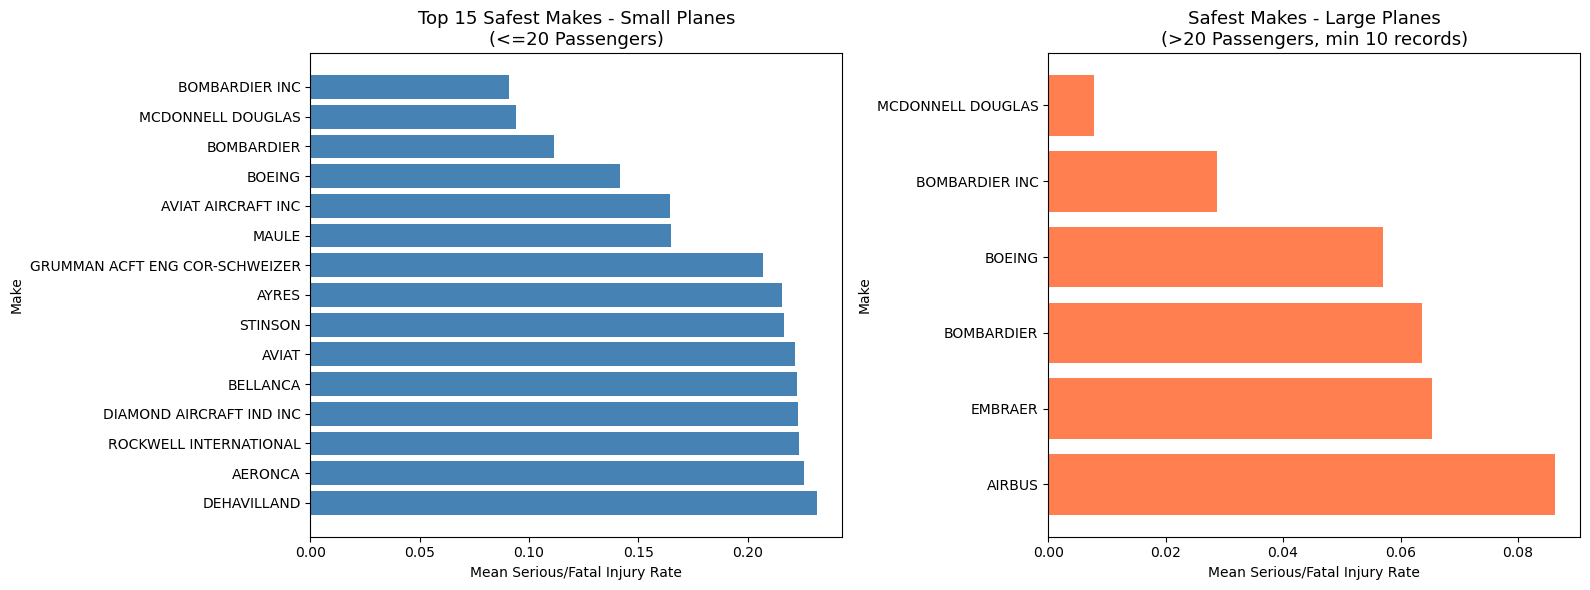

In [21]:
# Calculate mean Serious.Fatal.Injury.Rate per Make for each group
# Add minimum record threshold like at least 10 accidents to make the ranking statistically meaningful, 
# because there are a few large planes with 0.0 mean
small_make_risk = (small_planes_df.groupby('Make')
                    .filter(lambda x: len(x) >= 10)
                   .groupby('Make')['Serious.Fatal.Injury.Rate']
                   .mean()
                   .sort_values()
                   .head(15))

large_make_risk = (large_planes_df.groupby('Make')
                   .filter(lambda x: len(x) >= 10)
                   .groupby('Make')['Serious.Fatal.Injury.Rate']
                   .mean()
                   .sort_values()
                   .head(15))

print("Top 15 Safest Makes - Small Planes:")
print(small_make_risk)
print("\nTop 15 Safest Makes - Large Planes:")
print(large_make_risk)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Small planes
axes[0].barh(small_make_risk.index[::-1], small_make_risk.values[::-1], color='steelblue')
axes[0].set_title('Top 15 Safest Makes - Small Planes\n(<=20 Passengers)', fontsize=13)
axes[0].set_xlabel('Mean Serious/Fatal Injury Rate')
axes[0].set_ylabel('Make')

# Large planes - only 6 makes meet the threshold
axes[1].barh(large_make_risk.index[::-1], large_make_risk.values[::-1], color='coral')
axes[1].set_title('Safest Makes - Large Planes\n(>20 Passengers, min 10 records)', fontsize=13)
axes[1].set_xlabel('Mean Serious/Fatal Injury Rate')
axes[1].set_ylabel('Make')

plt.tight_layout()
plt.show()


**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.